In [ ]:
#mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

#set repo path and check repo status
repo_path = '/content/drive/MyDrive/geomsha/'
%cd /content/drive/MyDrive/geomsha/
!git status


In [3]:
#initialize environment, load modules/libraries

import io
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image
import pandas as pd

#import python code from seperate files
from geomgen.generators import gen_shapes, gen_noise, gen_image, gen_details

rnd=np.random.default_rng(100)


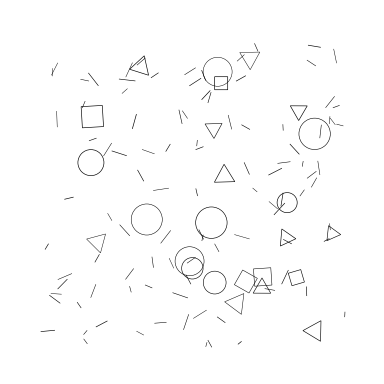

In [3]:
num_shapes=25
max_radius=1/20
min_radius=1/40
shapes = gen_shapes(rnd, num_shapes, max_radius, min_radius, False, False)

num_noise=100
max_line=1/20
min_line=1/80
noise = gen_noise(rnd, num_noise, max_line, min_line)

im_size=320
max_lw=0.15
min_lw=0.1
img, sha, nse = gen_image(shapes, noise, rnd, im_size, max_lw, min_lw, False)


In [3]:
fig = plt.figure(figsize=(1,1),dpi=len(img))
fig.figimage(img, cmap='gray')
fig.savefig('data/tmp_image.png')


<Figure size 320x320 with 0 Axes>

In [4]:
radius = int(max_radius*im_size)+1
shapes_im_size = 2*radius+1
mid_point = sha[:,1:3].astype(int)
mid_point = np.c_[im_size-mid_point[:,1],mid_point[:,0]]
lower_left = mid_point-radius
upper_right = lower_left+shapes_im_size

shapes_img = np.full((num_shapes,shapes_im_size,shapes_im_size),255)

for i, s in enumerate(shapes_img):
    x_min = lower_left[i,0]-1
    x_max = upper_right[i,0]-1
    y_min = lower_left[i,1]
    y_max = upper_right[i,1]
    x_min_cut = max(x_min,0)
    x_max_cut = min(x_max,im_size)
    y_min_cut = max(y_min,0)
    y_max_cut = min(y_max,im_size)
    x_min_off = x_min_cut-x_min
    x_max_off = x_max-x_max_cut
    y_min_off = y_min_cut-y_min
    y_max_off = y_max-y_max_cut
    s[x_min_off:(shapes_im_size-x_max_off),y_min_off:(shapes_im_size-y_max_off)] = img[x_min_cut:x_max_cut,y_min_cut:y_max_cut]
 

In [ ]:
radius = int(max_radius*im_size)+1
shapes_im_size = 2*radius+1

shapes_img = gen_details(shapes_im_size,sha,img)

In [5]:
details = np.zeros((1+(shapes_im_size+1)*5,1+(shapes_im_size+1)*5))

for i, s in enumerate(shapes_img):
    x = i//5
    y = i%5
    details[1+(shapes_im_size+1)*x:1+(shapes_im_size+1)*x+shapes_im_size,1+(shapes_im_size+1)*y:1+(shapes_im_size+1)*y+shapes_im_size] = s

fig = plt.figure(figsize=(1,1),dpi=len(details))
fig.figimage(details, cmap='gray')
fig.savefig('data/tmp_details.png')


<Figure size 181x181 with 0 Axes>